In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
from constants import *
from matplotlib import rc # used for increasing font size in plots


###  Agile Octopus London Home Electricity Prices, pounds per kilowatt-hour
Source: [My Smart Energy](https://mysmartenergy.uk/Download-Data/London)

If you have your half hourly consumption data from your smart meter you can use this Agile Octopus Prices file to check what your bill would be with this tariff. Both Local (including British Summer Time) and UTC (GMT) times are shown, please choose the correct column when matching to your consumption data. Prices are shown both with and without VAT added. When comparing bills please also note the daily standing charges.

#### Each 24 hour day would have two half hour measurements, so 48 data points in a day 


In [2]:
half_hourly_prices = pd.read_csv(f"{DATA_FOLDER}/recent_agile_octopus.csv")
half_hourly_prices.head()


,Valid_From_UTC,Valid_To_UTC,Valid_From_Local,Valid_To_Local,Price_Inc_VAT,Price_Ex_VAT
0,3/19/24 0:00,3/19/24 0:30,3/19/24 0:00,3/19/24 0:30,10.19,9.70
1,3/19/24 0:30,3/19/24 1:00,3/19/24 0:30,3/19/24 1:00,11.26,10.72
2,3/19/24 1:00,3/19/24 1:30,3/19/24 1:00,3/19/24 1:30,10.90,10.38
3,3/19/24 1:30,3/19/24 2:00,3/19/24 1:30,3/19/24 2:00,9.18,8.74
4,3/19/24 2:00,3/19/24 2:30,3/19/24 2:00,3/19/24 2:30,9.81,9.34


In [3]:
len(half_hourly_prices)

6764

In [4]:
date_column= 'Valid_From_UTC'
data_column = 'Price_Ex_VAT'
half_hourly_prices[date_column] = pd.to_datetime(half_hourly_prices[date_column])


/var/folders/v1/24qfth9s4hd8jjscffmwx4yw0000gn/T/ipykernel_7876/238797309.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  half_hourly_prices[date_column] = pd.to_datetime(half_hourly_prices[date_column])


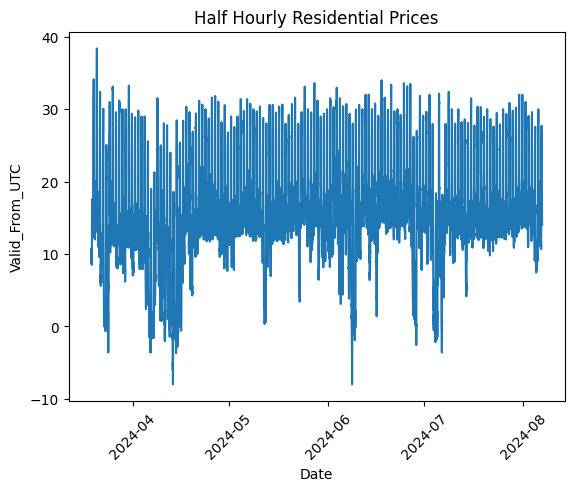

In [5]:
# Graph the daily average system price from 2020 to June 2024

plt.plot(half_hourly_prices[date_column], half_hourly_prices[data_column])
plt.xlabel('Date')
plt.ylabel(date_column)
plt.title('Half Hourly Residential Prices')
plt.xticks(rotation=45)
plt.show()


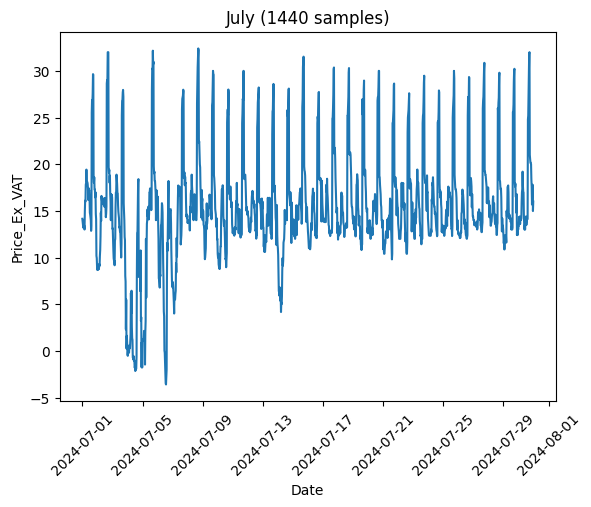

In [6]:
start_date = '2024-07-01'
end_date = '2024-07-31'

filtered_data = half_hourly_prices[(half_hourly_prices[date_column] >= start_date) & (half_hourly_prices[date_column] < end_date)]
num_data_points = len(filtered_data)

plt.plot(filtered_data[date_column], filtered_data[data_column])
plt.xlabel('Date')
plt.ylabel(data_column)
plt.title(f'July ({num_data_points} samples)')
plt.xticks(rotation=45)
plt.show()

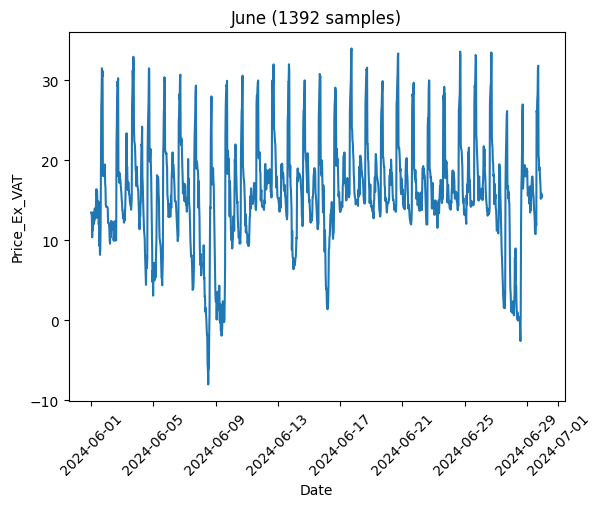

In [7]:
start_date = '2024-06-01'
end_date = '2024-06-30'

filtered_data = half_hourly_prices[(half_hourly_prices[date_column] >= start_date) & (half_hourly_prices[date_column] < end_date)]
num_data_points = len(filtered_data)

plt.plot(filtered_data[date_column], filtered_data[data_column])
plt.xlabel('Date')
plt.ylabel(data_column)
plt.title(f'June ({num_data_points} samples)')
plt.xticks(rotation=45)
plt.show()

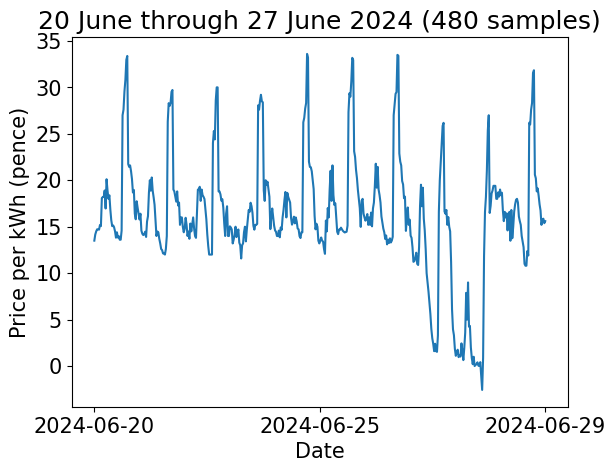

count    480.000000
mean      16.184667
std        6.469421
min       -2.570000
25%       14.000000
50%       15.830000
75%       18.685000
max       33.600000
Name: Price_Ex_VAT, dtype: float64

In [12]:
import matplotlib.dates as mdates
start_date = '2024-06-20'
end_date = '2024-06-30'

# Create the plot
fig, ax = plt.subplots()
ax.set_xlabel('Date')
ax.set_ylabel("Price per kWh (pence)")

# Calculate positions for 0%, 25%, 50%, 75%, and 100% of the dataset
ticks_positions = [
    filtered_data[date_column].iloc[0],                           # 0%
    # filtered_data[date_column].iloc[num_data_points // 4],        # 25%
    filtered_data[date_column].iloc[num_data_points // 2],        # 50%
    # filtered_data[date_column].iloc[3 * num_data_points // 4],    # 75%
    filtered_data[date_column].iloc[-1]                           # 100%
]

# Set the custom tick positions
ax.set_xticks(ticks_positions)

# Format the dates to appear shortened and rotated at 45 degrees for better readability
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate the date labels slightly for readability in a 2-week range
plt.xticks(rotation=0)

filtered_data = half_hourly_prices[(half_hourly_prices[date_column] >= start_date) & (half_hourly_prices[date_column] < end_date)]
num_data_points = len(filtered_data)

plt.plot(filtered_data[date_column], filtered_data[data_column])
plt.xlabel('Date')
ax.set_ylabel("Price per kWh (pence)")
plt.title(f'20 June through 27 June 2024 ({num_data_points} samples)')
plt.savefig('results/plots/20-27June.png',dpi=300)
plt.show()

utils.get_data_stats(filtered_data[data_column])

= = = > Chronos pipeline not initialized. Firing up chronos-tiny-336-48-8_000-alpha pipeline. May take time..
Version is chronos-tiny-336-48-8_000-alpha


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/transformers/generation/logits_process.py:156: UserWarning: The operator 'aten::isin.Tensor_Tensor_out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:13.)
  eos_token_mask = torch.isin(vocab_tensor, eos_token_id)


chronos-tiny-336-48-8_000-alpha
= = = > Chronos pipeline not initialized. Firing up chronos-tiny-336-48-8_000-beta pipeline. May take time..
Version is chronos-tiny-336-48-8_000-beta


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos-tiny-336-48-8_000-beta
= = = > Chronos pipeline not initialized. Firing up chronos-tiny-336-48-8_000-delta pipeline. May take time..
Version is chronos-tiny-336-48-8_000-delta


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos-tiny-336-48-8_000-delta
= = = > Chronos pipeline not initialized. Firing up chronos-tiny-336-48-8_000-abd pipeline. May take time..
Version is chronos-tiny-336-48-8_000-abd


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos-tiny-336-48-8_000-abd
= = = > Chronos pipeline not initialized. Firing up chronos_tiny pipeline. May take time..
Version is chronos_tiny


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos_tiny
= = = > Chronos pipeline not initialized. Firing up chronos_mini pipeline. May take time..
Version is chronos_mini


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos_mini
= = = > Chronos pipeline not initialized. Firing up chronos_small pipeline. May take time..
Version is chronos_small


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos_small
= = = > Chronos pipeline not initialized. Firing up chronos_base pipeline. May take time..
Version is chronos_base


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos_base
= = = > Chronos pipeline not initialized. Firing up chronos_large pipeline. May take time..
Version is chronos_large


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


chronos_large

Results comparison for Price_Ex_VAT:

MSE
- chronos-tiny-336-48-8_000-alpha MSE: 50.26640183827143
- chronos-tiny-336-48-8_000-beta MSE: 48.14738264100632
- chronos-tiny-336-48-8_000-delta MSE: 131.04245144243058
- chronos-tiny-336-48-8_000-abd MSE: 105.87469372436902
- chronos_tiny MSE: 55.79984293984592
- chronos_mini MSE: 52.36523818860534
- chronos_small MSE: 54.776506392070296
- chronos_base MSE: 55.280794005867826
- chronos_large MSE: 56.74171437889589
- arima MSE: 79.176974296166
- gp MSE: 78.73672457576788
NMSE
- chronos-tiny-336-48-8_000-alpha NMSE: 1.1377241250955925
- chronos-tiny-336-48-8_000-beta NMSE: 1.0897624812519375
- chronos-tiny-336-48-8_000-delta NMSE: 2.9660002101882674
- chronos-tiny-336-48-8_000-abd NMSE: 2.396355992913135
- chronos_tiny NMSE: 1.2629674129742883
- chronos_mini NMSE: 1.1852289526359716
- chronos_small NMSE: 1.2398053278454912
- chronos_base NMSE: 1.2512193173737314
- chronos_large NMSE: 1.284285625930796
- arima NMSE: 1.79208279316

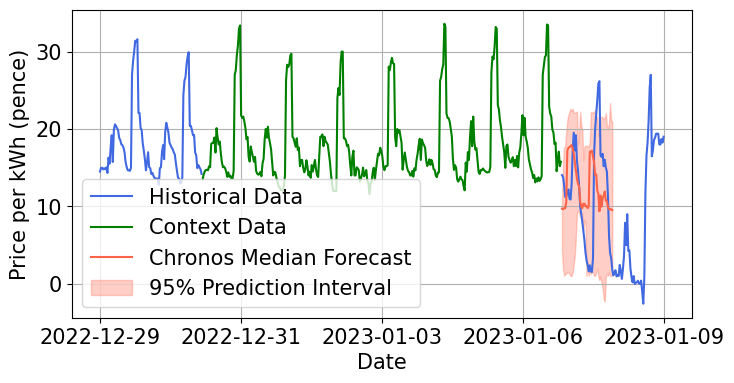

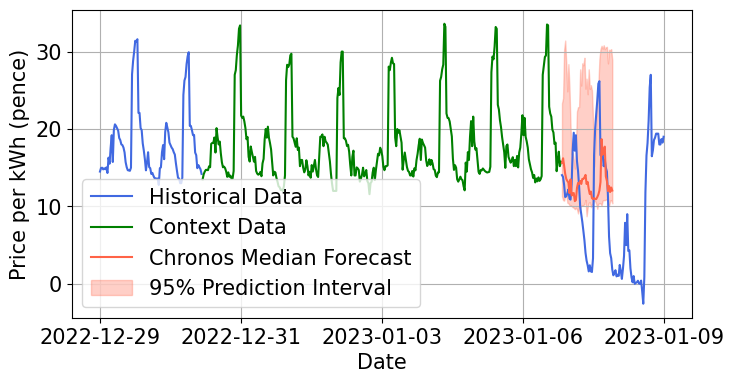

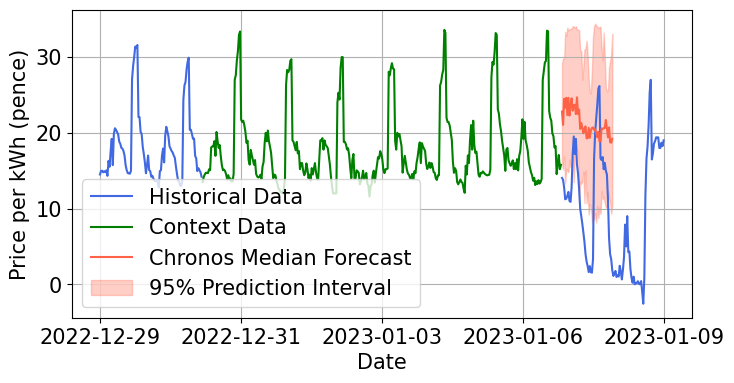

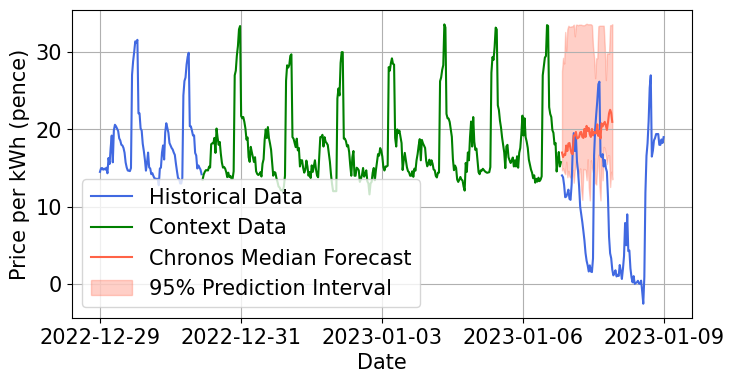

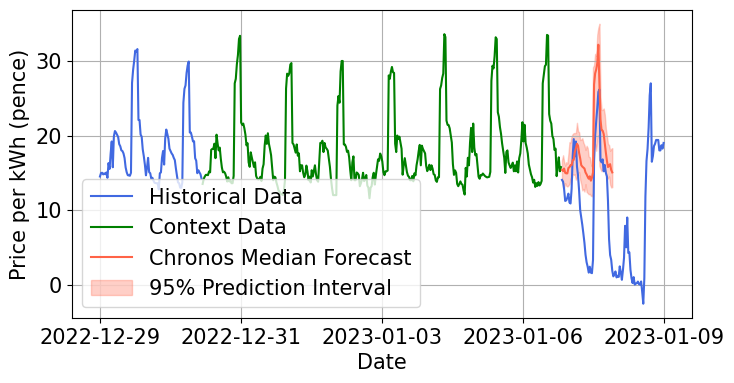

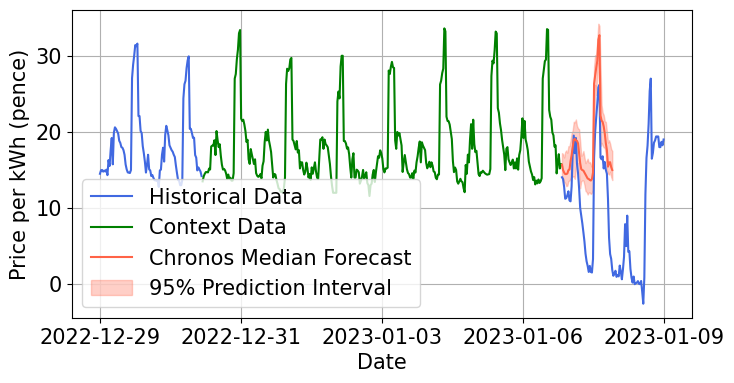

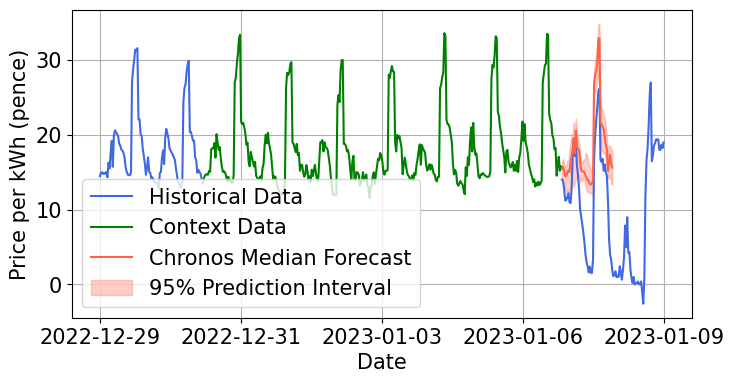

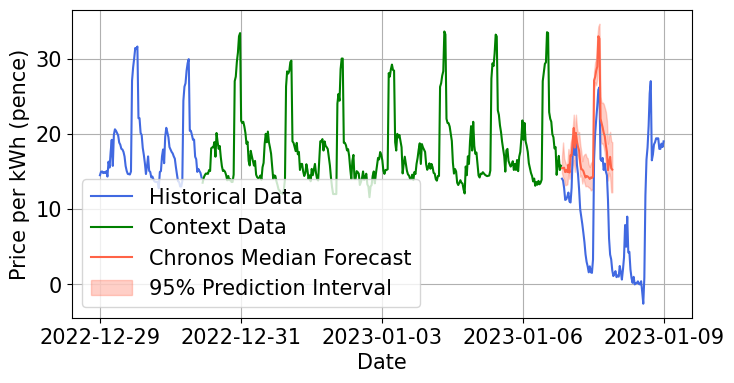

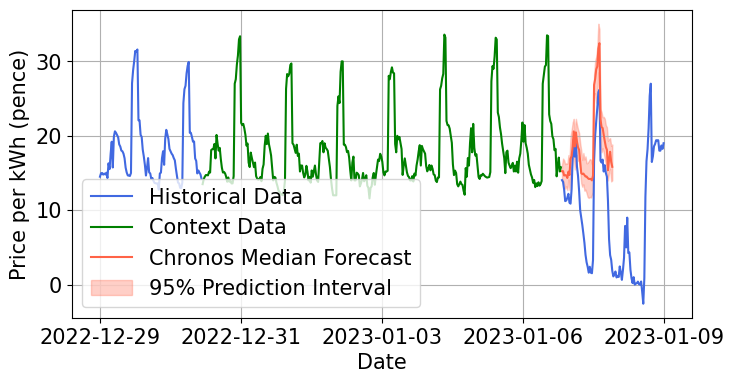

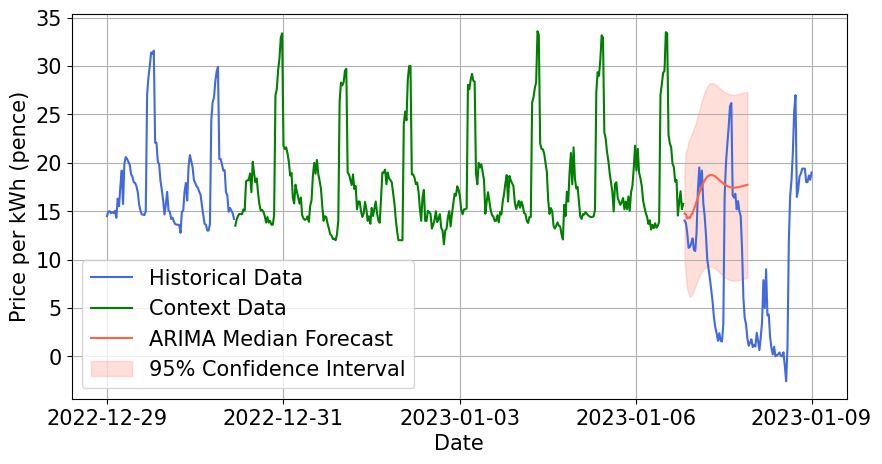

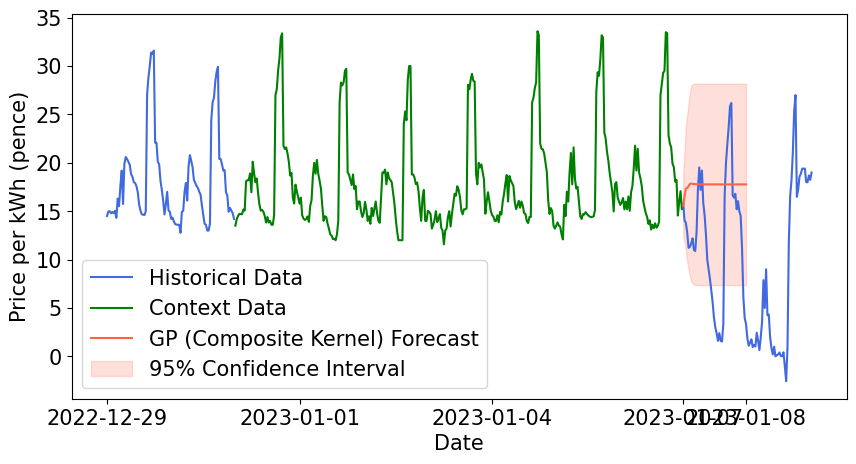

In [9]:


start_date = '2024-06-20'
end_date = '2024-06-27'
prediction_length = 48
date_column
_ = utils.compare_prediction_methods(half_hourly_prices,data_column, date_column,start_date,end_date,prediction_length,methods=['chronos-tiny-336-48-8_000-alpha','chronos-tiny-336-48-8_000-beta','chronos-tiny-336-48-8_000-delta','chronos-tiny-336-48-8_000-abd','chronos_tiny','chronos_mini','chronos_small','chronos_base','chronos_large','arima','gp'],run_name='rwcd_one_week')
